# **Waze Project**
**Course 4 - The Power of Statistics**

Your team is nearing the midpoint of their user churn project. So far, you’ve completed a project proposal, and used Python to explore and analyze Waze’s user data. You’ve also used Python to create data visualizations. The next step is to use statistical methods to analyze and interpret your data.

You receive a new email from Sylvester Esperanza, your project manager. Sylvester tells your team about a new request from leadership: to analyze the relationship between mean amount of rides and device type. You also discover follow-up emails from three other team members: May Santner, Chidi Ga, and Harriet Hadzic. These emails discuss the details of the analysis. They would like a statistical analysis of ride data based on device type. In particular, leadership wants to know if there is a statistically significant difference in mean amount of rides between iPhone® users and Android™ users. A final email from Chidi includes your specific assignment: to conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of rides between iPhone users and Android users.

A notebook was structured and prepared to help you in this project. Please complete the following questions and prepare an executive summary.

# **Course 4 End-of-course project: Data exploration and hypothesis testing**

In this activity, you will explore the data provided and conduct a hypothesis test.
<br/>

**The purpose** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.
<br/>

*This activity has three parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct hypothesis testing
* How did computing descriptive statistics help you analyze your data?

* How did you formulate your null hypothesis and alternative hypothesis?

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from your hypothesis test?

* What business recommendations do you propose based on your results?

<br/>


Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Data exploration and hypothesis testing**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below to craft your response:
1. What is your research question for this data project? Later on, you will need to formulate the null and alternative hypotheses as the first step of your hypothesis test. Consider your research question now, at the start of this task.


Do app users who use Iphone have the same number of drives compared to their Android counterparts?

*Complete the following tasks to perform statistical analysis of your data:*

### **Task 1. Imports and data loading**




Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


Import the dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv('waze_dataset.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Analyze and Construct**

Consider the questions in your PACE Strategy Document and those below to craft your response:
1. Data professionals use descriptive statistics for exploratory data analysis (EDA). How can computing descriptive statistics help you learn more about your data in this stage of your analysis?


- Descriptive statistics provide a quick and brief summary overview of our data.
- They allow us to understand large amounts of data before proceeding with any analysis.
- Computing descriptive statistics offer us a quick and accurate way to calculate this statistics ie means, counts, standard deviations etc


### **Task 2. Data exploration**

Use descriptive statistics to conduct exploratory data analysis (EDA).

In [3]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
data['device'].value_counts()

iPhone     9672
Android    5327
Name: device, dtype: int64

[Text(0.5, 1.0, 'Count of Android vs iPhone')]

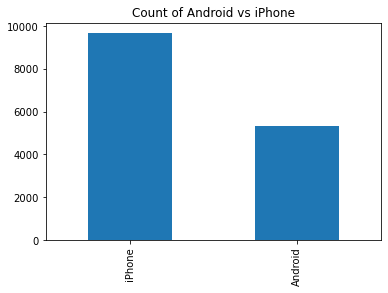

In [7]:
data['device'].value_counts().plot(kind='bar').set(title='Count of Android vs iPhone')

#### Majority of the riders appear to be iPhone users

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

In order to perform this analysis, you must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.  It assigns this label back to the variable `device_new`.

**Note:** Creating a new variable is ideal so that you don't overwrite original data.



1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['column']
```

|column |
|  :-:       |
| A     |
| B     |
| A     |
| B     |

```
map_dictionary = {'A': 2, 'B': 1}
df['column'] = df['column'].map(map_dictionary)
df['column']
```

|column |
|  :-: |
| 2    |
| 1    |
| 2    |
| 1    |


In [10]:
map_dictionary = {'Android':2,'iPhone':1}

data['device_new'] = data['device'].map(map_dictionary)

You are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [11]:
data.groupby('device_new')['drives'].mean()

device_new
1    67.859078
2    66.231838
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, you can conduct a hypothesis test.


### **Task 3. Hypothesis testing**

Your goal is to conduct a two-sample t-test. Recall the steps for conducting a hypothesis test:


1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).

Recall the difference between the null hypothesis ($H_0$) and the alternative hypothesis ($H_A$).

**Question:** What are your hypotheses for this data project?

- Null hypothesis : There is no difference in average amount of rides between android and iphone users
- Alternative hypothesis : There is a statistical difference in average amount of rides between iphone and android users

Next, choose 5% as the significance level and proceed with a two-sample t-test.

You can use the `stats.ttest_ind()` function to perform the test.


**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [12]:
iphone = data[data['device_new'] == 1]
android = data[data['device_new'] == 2]

stats.ttest_ind(a=iphone['drives'],b=android['drives'],equal_var=False)

Ttest_indResult(statistic=1.4635232068852353, pvalue=0.1433519726802059)

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?

- The p-value of 0.1433 is larger than our significance level (0.05).
- This means that we don't have enough evidence to reject the null hypothesis.
- Therefore, there is not a significant difference in the average number of rides between android and iphone users.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Communicate insights with stakeholders**

Now that you've completed your hypothesis test, the next step is to share your findings with the Waze leadership team. Consider the following question as you prepare to write your executive summary:

* What business insight(s) can you draw from the result of your hypothesis test?

- We've figured out that drivers who use both android and iPhone have a similar number of drives.
- It could be worth looking into other factors that might be causing churn and analysing them,


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.